<a href="https://colab.research.google.com/github/zoefalomir/Perceptron/blob/main/OR-zoe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Learning the OR function with a perceptron

This is the truth table of the OR function.

| Input $x_1$ | Input $x_2$ | Output $y$ |
| :---: | :---: | :---: |
| 0	| 0	| 0 |
| 0	| 1	| 1 |
| 1	| 0	| 1 |
| 1	| 1	| 1 |

This is also a linear separability example using a single [perceptron](https://en.wikipedia.org/wiki/Perceptron).

Again, let's do some imports and define the functions for fancy plots.

In [1]:
import numpy as np
import sklearn.linear_model

import matplotlib.pyplot as plt

def plot_decision_boundary(net):
    xmin, xmax = plt.xlim()
    ymin, ymax = plt.ylim()
    w = net.coef_[0]
    b = net.intercept_[0]
    if not w[1]==0:
        a = -w[0] / w[1]
        xx = np.linspace(xmin, xmax)
        yy = a * xx - b / w[1]
    elif not w[0]==0:
        a = -w[1] / w[0]
        yy = np.linspace(ymin, ymax)
        xx = a * yy - b / w[0]
    else:
        xx = []
        yy = []
    plt.plot(xx,yy, 'b-')
    plt.xlim([xmin,xmax])
    plt.ylim([ymin,ymax])

def plot_data(x,y):
    plt.rcParams['figure.figsize'] = (3.0, 3.0)
    colormap = np.array(['r', 'k'])
    plt.scatter(x[:,0], x[:,1], c=colormap[y.astype(int)], s=50);
    plt.axis([-1.2,1.2,-1.2,1.2]);

%matplotlib inline

## Load in the data

In [4]:
x = np.array([[0.,0.],\
              [0.,1.],\
              [1.,0.],\
              [1.,1.]])
y = np.array([0.,1.,1.,1.])

## Plot the data


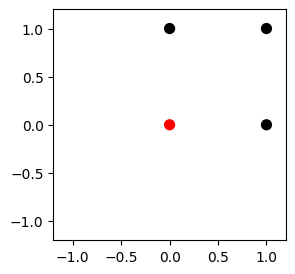

In [5]:
plot_data(x, y)

## Build the model
Create a [perceptron object](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html).

In [6]:
net = sklearn.linear_model.Perceptron(max_iter=1, tol=1e-3, warm_start=True)

## Train
Repeat the following cell (`Ctrl+Enter`) until the model converges.

Coefficient 0:  2.000
Coefficient 1:  2.000
         Bias: -1.000
    Target: [0. 1. 1. 1.]
Prediction: [0. 1. 1. 1.]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


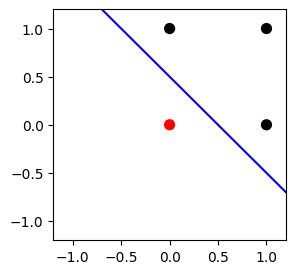

In [10]:
net.fit(x,y)
print("Coefficient 0: %6.3f" % net.coef_[0,0])
print("Coefficient 1: %6.3f" % net.coef_[0,1])
print("         Bias: %6.3f" % net.intercept_.item())
plot_data(x, y)
plot_decision_boundary(net)
print('    Target: %s' % np.array_str(y))
print('Prediction: %s' % np.array_str(net.predict(x)))

Again, when the model converges, the perceptron boundary completely separates the samples of each class (0's and 1's).

The resulting plot should look like this:


<img src="https://github.com/RobInLabUJI/Perceptron/raw/7592de1ff8d4c2459106700e5e26bd2ac983f1da/img/perceptron_or_converge.png" align="right">